In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import rcParams
from sklearn import linear_model
from matplotlib.patches import Rectangle
from statsmodels.tsa import arima_process
from statsmodels.tsa.arima.model import ARIMA
from mpl_toolkits.mplot3d import Axes3D 

rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [8,5]


## Compare Regression

In [2]:
n = 100
L = 4
x = np.linspace(0,L,n)
f = np.power(x,2) # Parabola with 100 data points

M = 20 # Polynomial degree

In [3]:
phi = np.zeros((n,M))
for j in range(M):
    phi[:,j] = np.power(x,j) # Build matrix A

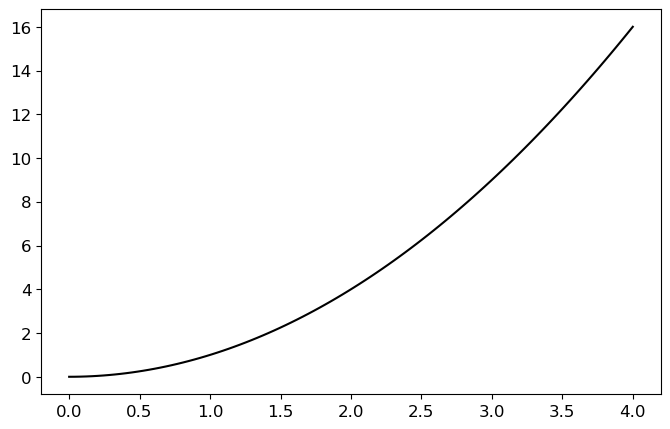

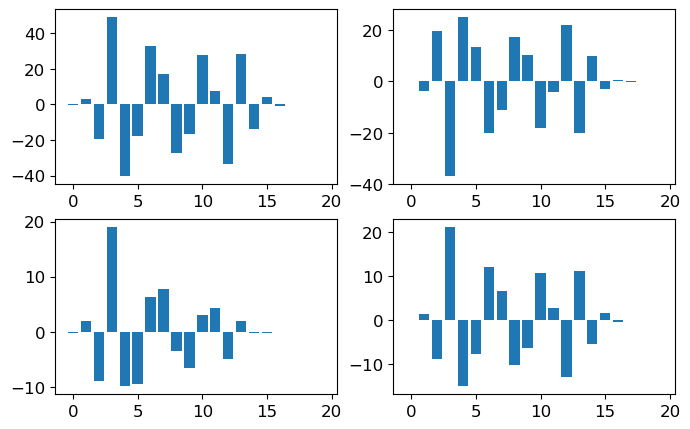

In [4]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.figure()
plt.plot(x,f,color='k')
    
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

for j in range(4):
    fn = np.power(x,2) + 0.1*np.random.randn(*x.shape)
    an = np.linalg.pinv(phi) @ fn # Least-square fit
    fna = phi @ an 
    En = np.linalg.norm(f-fna,ord=2)/np.linalg.norm(f,ord=2)
    axs[j].bar(range(len(an)),an)

plt.show()

c:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.920e+00, tolerance: 2.273e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.886e+00, tolerance: 2.273e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+

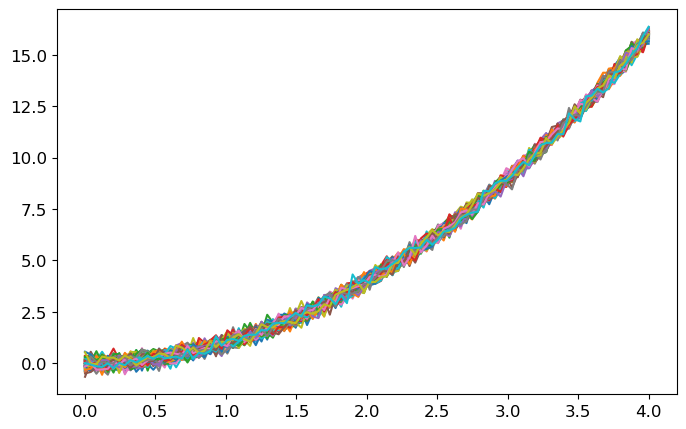

In [5]:
## Different regressions
plt.figure()
plt.plot(x,f,color='k')

lam = 0.1
phi2 = phi[:,1:]
E1 = np.zeros(100)
E2 = np.zeros(100)
E3 = np.zeros(100)
E4 = np.zeros(100)
E5 = np.zeros(100)
E6 = np.zeros(100)

A1 = np.zeros((M,100))
A2 = np.zeros((M,100))
A3 = np.zeros((M,100))
A4 = np.zeros((M,100))
A5 = np.zeros((M,100))
A6 = np.zeros((M,100))

for jj in range(100):
# for jj in range(10):
    f = np.power(x,2)+0.2*np.random.randn(n)
    
    a1 = np.linalg.pinv(phi) @ f
    f1 = phi @ a1
    E1[jj] = np.linalg.norm(f-f1,ord=2)/np.linalg.norm(f,ord=2)
    
    a2 = np.linalg.lstsq(phi,f,rcond=None)[0]
    f2 = phi @ a2
    E2[jj] = np.linalg.norm(f-f2,ord=2)/np.linalg.norm(f,ord=2)
    
    regr3 = linear_model.ElasticNet(alpha=1.0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr3.fit(phi, f)  
    a3 = regr3.coef_
    f3 = phi @ a3
    E3[jj] = np.linalg.norm(f-f3,ord=2)/np.linalg.norm(f,ord=2)
    
    regr4 = linear_model.ElasticNet(alpha=0.8, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr4.fit(phi, f)  
    a4 = regr4.coef_
    f4 = phi @ a4
    E4[jj] = np.linalg.norm(f-f4,ord=2)/np.linalg.norm(f,ord=2)
    
    huber = linear_model.HuberRegressor().fit(phi, f) # matlab's robustfit() does not have an exact sklearn analogue
    a5 = huber.coef_
    f5 = phi @ a5
    E5[jj] = np.linalg.norm(f-f5,ord=2)/np.linalg.norm(f,ord=2)

    ridge = linear_model.Ridge(alpha=1.0).fit(phi,f)
    a6 = ridge.coef_
    f6 = phi @ a6
    E6[jj] = np.linalg.norm(f-f6,ord=2)/np.linalg.norm(f,ord=2)

    
    A1[:,jj] = a1
    A2[:,jj] = a2
    A3[:,jj] = a3
    A4[:,jj] = a4
    A5[:,jj] = a5
    A6[:,jj] = a6

    plt.plot(x,f)
    
Err = np.column_stack((E1,E2,E3,E4,E5,E6))
Err2 = np.column_stack((E1,E2,E3,E4,E5))

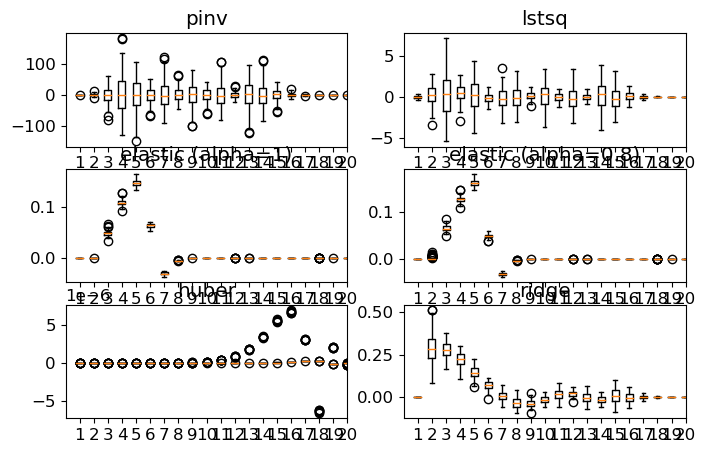

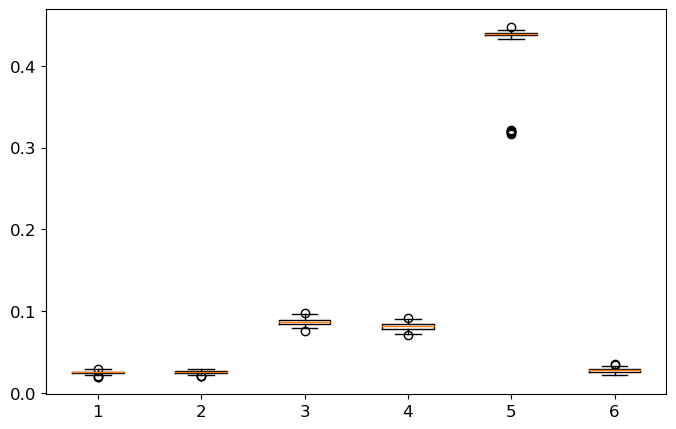

In [6]:
fig,axs = plt.subplots(3,2)
axs = axs.reshape(-1)

axs[0].boxplot(A1.T)
axs[0].set_title('pinv')
axs[1].boxplot(A2.T)
axs[1].set_title('lstsq')
axs[2].boxplot(A3.T)
axs[2].set_title('elastic (alpha=1)')
axs[3].boxplot(A4.T)
axs[3].set_title('elastic (alpha=0.8)')
axs[4].boxplot(A5.T)
axs[4].set_title('huber')
axs[5].boxplot(A6.T)
axs[5].set_title('ridge')

for ax in axs:
    ax.set_xlim(0,M)
    
plt.figure()
plt.boxplot(Err)

plt.show()

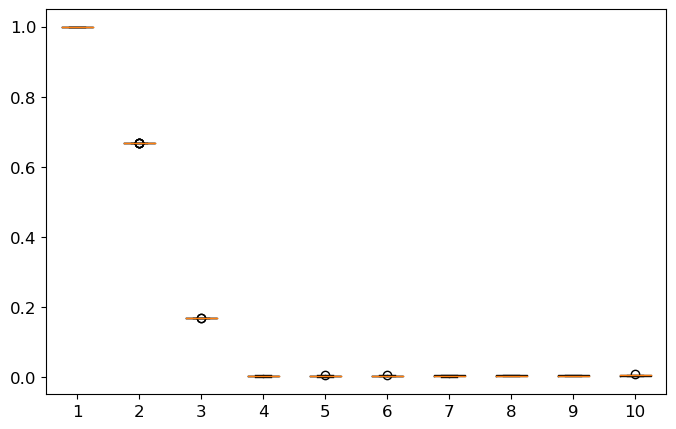

In [7]:
M = 10
En = np.zeros((100,M))
phi = np.zeros((len(x),M))
for jj in range(M):
    for j in range(jj):
        phi[:,j] = np.power(x,j)
    f = np.power(x,2)
    for j in range(100):
        fn = np.power(x,2) + 0.1*np.random.randn(n)
        an = np.linalg.pinv(phi) @ fn
        fna = phi @ an
        En[j,jj] = np.linalg.norm(f-fna,ord=2)/np.linalg.norm(f,ord=2)
        
plt.boxplot(En)

plt.show()

In [8]:
## Pareto Front for Regression Models

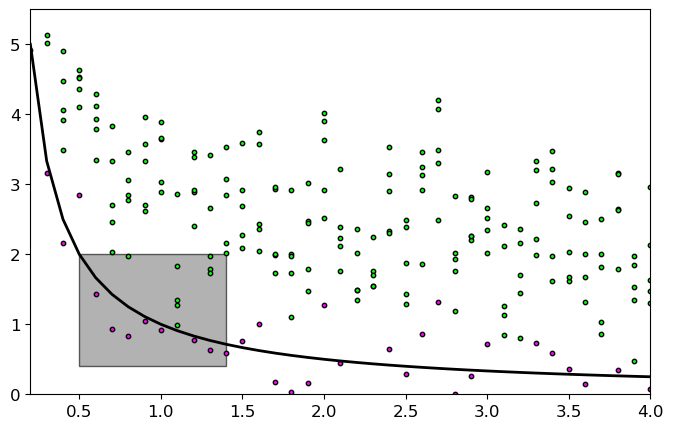

In [9]:
fig,ax = plt.subplots(1)
x = np.arange(0.2,5,0.1)
y = np.divide(1,x)

x2 = np.copy(x)
n = len(x2)
y2 = np.divide(1,x2) + 0.5*np.random.randn(n)

y3 = (np.tile(y2,(5,1)) + 2*np.random.rand(5,n) + 1)
y3 = np.reshape(y3,-1)
x3 = np.tile(x,(1,5)).reshape(-1)

plt.plot(x,y,color='k',linewidth=2)

rect = Rectangle((0.5,0.4), 0.9, 1.6,linewidth=1,edgecolor='k',facecolor='grey',alpha=0.6) 
ax.add_patch(rect)

plt.scatter(x2,y2,10,color='magenta',edgecolors='k')
plt.scatter(x3,y3,10,color='lime',edgecolors='k')


plt.xlim(0.2,4)
plt.ylim(0,5.5)

plt.show()

## Cross Validation

In [10]:
n = 200
L = 8
x = np.linspace(0,L,n)
x1 = x[:100]    # Train
x2 = x[100:200] # Test
n1 = len(x1)
n2 = len(x2)
ftrain = np.power(x1,2) # Train parabola x = [0,4]
ftest = np.power(x2,2)  # Test parabola x = [4,8]

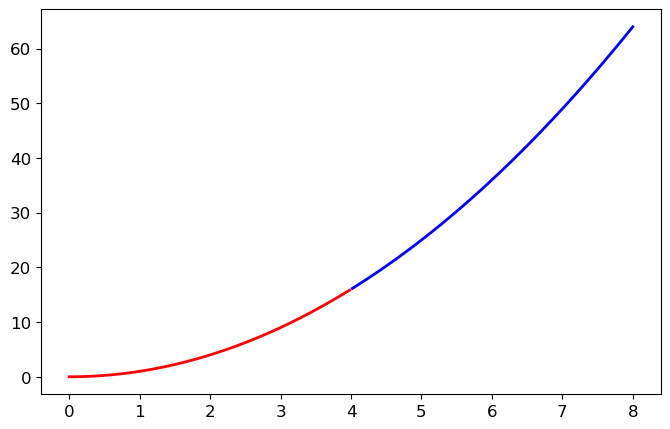

In [11]:
plt.plot(x1,ftrain,color='r',linewidth=2)
plt.plot(x2,ftest,color='b',linewidth=2)
plt.show()
M = 30 # number of model terms
Eni = np.zeros((100,M))
Ene = np.zeros((100,M))
for jj in range(M):
    phi_i = np.zeros((n1,jj+1))
    phi_e = np.zeros((n2,jj+1))
    for j in range(jj):
        phi_i[:,j] = np.power(x1,j) # interpolation key
        phi_e[:,j] = np.power(x2,j) # extrapolation key
    
    f = np.power(x,2)
    for j in range(100):
        fni = np.power(x1,2) + 0.1*np.random.randn(n1) # interpolation
        fne = np.power(x2,2) + 0.1*np.random.randn(n2) # extrapolation
        
        ani = np.linalg.pinv(phi_i) @ fni
        fnai = phi_i @ ani
        Eni[j,jj] = np.linalg.norm(ftrain-fnai,ord=2)/np.linalg.norm(ftrain,ord=2)
        
        fnae = phi_e @ ani # use loadings from x in [0,4]
        Ene[j,jj] = np.linalg.norm(ftest-fnae,ord=2)/np.linalg.norm(ftest,ord=2)
        

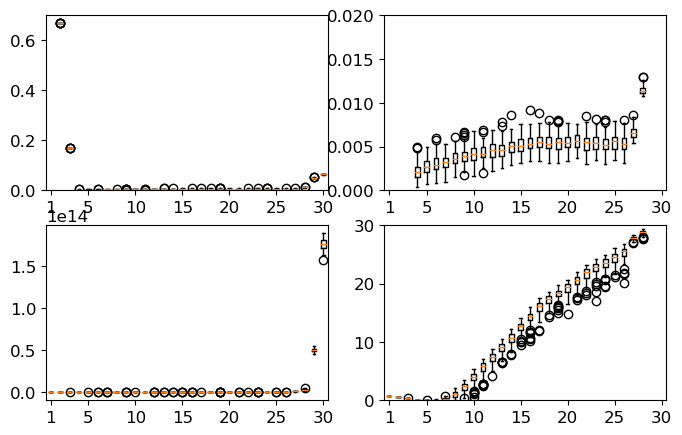

In [12]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].boxplot(Eni)
axs[0].set_ylim(0,0.7)
axs[1].boxplot(Eni)
axs[1].set_ylim(0,0.02)
axs[2].boxplot(Ene)
axs[3].boxplot(np.log(Ene+1))
axs[3].set_ylim(0,30)

for ax in axs:
    ax.set_xticks((1,5,10,15,20,25,30))
    ax.set_xticklabels((1,5,10,15,20,25,30))

plt.show()


### K-fold validation

In [13]:
n = 100
L = 4
x = np.linspace(0,L,n)
f = np.power(x,2) # parabola with 100 data points

In [14]:
M = 21 # Polynomial degree
phi = np.zeros((n,M))
for j in range(M):
    phi[:,j] = np.power(x,j) # build matrix A

In [15]:
trials = np.array([2, 10, 100])

c:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.229e+01, tolerance: 2.328e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.080e+01, tolerance: 2.341e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.070e+

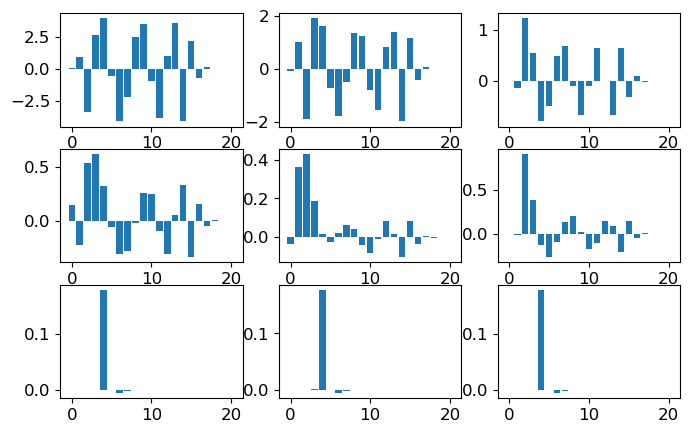

In [16]:
fig,axs = plt.subplots(3,3)

for j in range(len(trials)):
    trial = trials[j]
    E1 = np.zeros(trial)
    E2 = np.zeros(trial)
    E3 = np.zeros(trial)
    
    A1 = np.zeros((M,trial))
    A2 = np.zeros((M,trial))
    A3 = np.zeros((M,trial))

    
    for jj in range(trial):
        f = np.power(x,2) + 0.2*np.random.randn(n)
        a1 = np.linalg.pinv(np.copy(phi)) @ np.copy(f)
        f1 = phi @ a1
        E1[jj] = np.linalg.norm(f-f1,ord=2)/np.linalg.norm(f,ord=2)
        
        a2 = np.linalg.lstsq(np.copy(phi),np.copy(f),rcond=None)[0]
        f2 = phi @ a2
        E2[jj] = np.linalg.norm(f-f2,ord=2)/np.linalg.norm(f,ord=2)
        
#         regr3 = linear_model.ElasticNet(alpha=1.0, copy_X=True, l1_ratio=0.1, max_iter=10**5,random_state=0)
        regr3 = linear_model.Lasso(alpha=1)
        regr3.fit(phi, f)  
        a3 = regr3.coef_
        f3 = phi @ a3
        E3[jj] = np.linalg.norm(f-f3,ord=2)/np.linalg.norm(f,ord=2)
        
        A1[:,jj] = a1
        A2[:,jj] = a2
        A3[:,jj] = a3
        
    A1m = np.mean(A1,axis=1)
    A2m = np.mean(A2,axis=1)
    A3m = np.mean(A3,axis=1)
    
    Err = np.column_stack((E1,E2,E3))
    
    axs[0,j].bar(range(M),A1m)
    axs[1,j].bar(range(M),A2m)
    axs[2,j].bar(range(M),A3m)
    
plt.show()

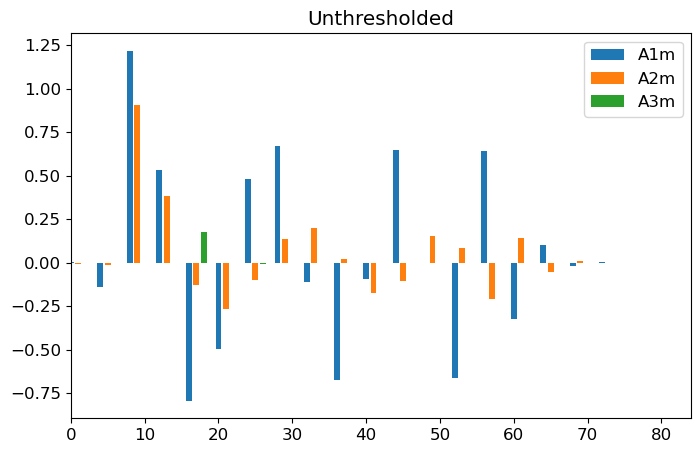

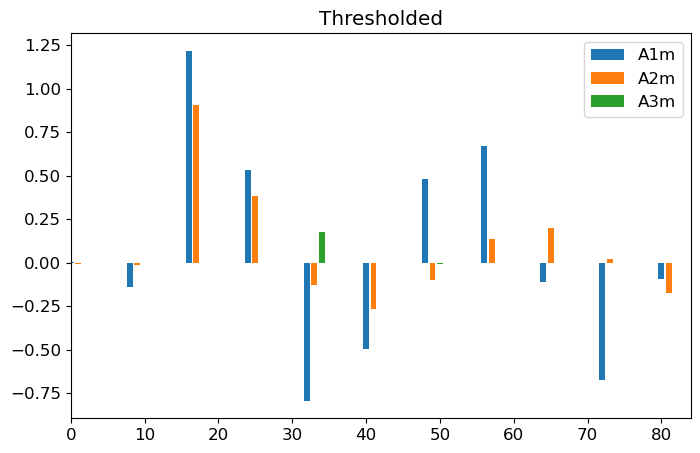

In [17]:
Atot = np.column_stack((A1m,A2m,A3m)) # Average loadings of three methods
Atot2 = (Atot>0.2) * Atot # threshold
Atot3 = np.column_stack((Atot,Atot2)) # combine both thresholded and not

for j in range(3):
    plt.bar(np.arange(Atot.shape[0])*4+j,Atot[:,j],label='A'+str(j+1)+'m')
    
plt.xlim(0,4*M)
plt.title('Unthresholded')
plt.legend()

plt.figure()
for j in range(3):
    plt.bar(np.arange(Atot2.shape[0])*8+j,Atot[:,j],label='A'+str(j+1)+'m')
    
plt.title('Thresholded')
plt.xlim(0,4*M)
plt.legend()

plt.show()

In [18]:
n = 200
L = 8
x = np.linspace(0,L,n)
x1 = x[:100]    # Train
x2 = x[100:200] # Test
n1 = len(x1)
n2 = len(x2)
ftrain = np.power(x1,2) # Train parabola x = [0,4]
ftest = np.power(x2,2)  # Test parabola x = [4,8]

In [19]:
phi_i = np.zeros((n1,M))
phi_e = np.zeros((n2,M))

for j in range(M):
    phi_i[:,j] = np.power(x1,j) # interpolation key
    phi_e[:,j] = np.power(x2,j) # extrapolation key
    
Eni = np.zeros(6)
Ene = np.zeros(6)
for jj in range(6): # compute inter/extra-polation scores
    ani = Atot3[:,jj]
    fnai = phi_i @ ani
    Eni[jj] = np.linalg.norm(ftrain-fnai,ord=2)/np.linalg.norm(ftrain,ord=2)
    fnae = phi_e @ ani
    Ene[jj] = np.linalg.norm(ftest-fnae,ord=2)/np.linalg.norm(ftest,ord=2)

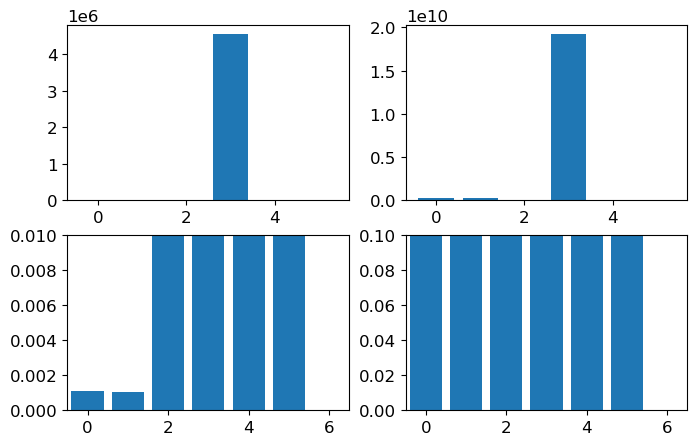

In [20]:
fig,axs = plt.subplots(2,2)
axs[0,0].bar(range(6),Eni)
axs[0,1].bar(range(6),Ene)
axs[1,0].bar(range(6),Eni)
axs[1,0].set_xlim(-0.5,6.5)
axs[1,0].set_ylim(0,0.01)
axs[1,1].bar(range(6),Ene)
axs[1,1].set_xlim(-0.5,6.5)
axs[1,1].set_ylim(0,0.1)

plt.show()

## Model Validation

In [21]:
n = 10000
x1 = np.random.randn(n) # "truth" model (data)
x2 = 0.8 * np.random.randn(n) + 1 # model 1
x3 = 0.5 * np.random.randn(n) - 1 # model 3 components
x4 = 0.7 * np.random.randn(n) - 3
x5 = 5.0 * np.random.rand(n) - 0.5 

x = np.arange(-6,6.01,0.01) # range for data
x_bincenters = np.arange(-6.005,6.01,0.01)


In [22]:
f = np.histogram(x1,bins=x_bincenters)[0] + 0.01 # generate PDFs
g1 = np.histogram(x2,bins=x_bincenters)[0] + 0.01
g2a = np.histogram(x3,bins=x_bincenters)[0]
g2b = np.histogram(x4,bins=x_bincenters)[0]
g2 = g2a + 0.3*g2b + 0.01
g3 = np.histogram(x5,bins=x_bincenters)[0] + 0.01

f = f/np.trapz(f,x) # normalize data
g1 = g1/np.trapz(g1,x)
g2 = g2/np.trapz(g2,x)
g3 = g3/np.trapz(g3,x)

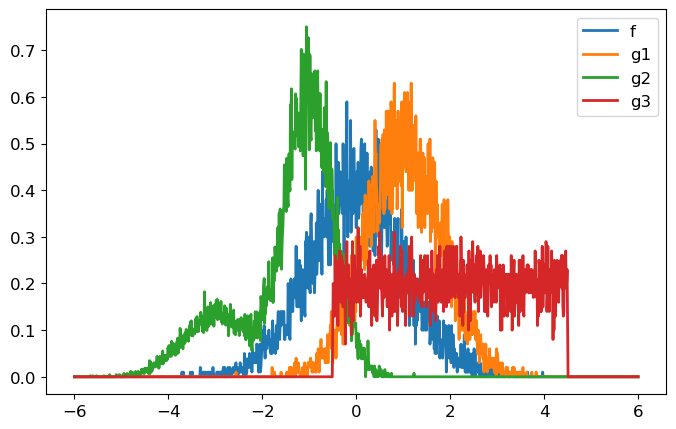

In [23]:
plt.figure()
plt.plot(x,f,linewidth=2,label='f')
plt.plot(x,g1,linewidth=2,label='g1')
plt.plot(x,g2,linewidth=2,label='g2')
plt.plot(x,g3,linewidth=2,label='g3')
plt.legend()
plt.show()

In [24]:
# Compute integrand
Int1 = f * np.log(np.divide(f,g1))
Int2 = f * np.log(np.divide(f,g2))
Int3 = f * np.log(np.divide(f,g3))

# KL divergence
I1 = np.trapz(Int1,x)
I2 = np.trapz(Int2,x)
I3 = np.trapz(Int3,x)